<a href="https://colab.research.google.com/github/hutashani-s/codsoft/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Genre Classification

**Dataset:** https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data

**Model:** Logistic Regression, Naive Bayes(Multinomial, Bernoulli), Support Vector Machine

*Logistic Regression* is a statistical model that predicts the probability of a binary outcome. It uses a logistic function to model the relationship between independent variables and the probability of the dependent variable.

*Naive Bayes* is a  family of probabilistic classifiers based on Bayes' theorem. It assumes that features are independent of each other (naive assumption).
- *Multinomial*: Used for discrete data
- *Gaussian*: Used for continuous data
- *Bernoulli*: Used for binary/boolean features

*Support Vector Machine(SVM)* is a powerful supervised learning algorithm that finds an optimal hyperplane to separate data points of different classes with the largest margin.


## Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import RandomOverSampler

### Importing Dataset

In [4]:
import kagglehub
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1


### Converting text file into Dataframe

In [5]:
train_data = pd.read_csv(path + "/Genre Classification Dataset/train_data.txt", sep=':::', header=None, names=['id','title','genre','description'], engine='python')
test_data = pd.read_csv(path + "/Genre Classification Dataset/test_data.txt", sep=':::', header=None, names=['id','title','description'], engine='python')
test_data_solution = pd.read_csv(path + "/Genre Classification Dataset/test_data_solution.txt", sep=':::', header=None, names=['id','title','genre','description'], engine='python')

## Preprocessing Data

### Merging test data with solution to get genre

In [6]:
test_data.head()

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [7]:
df_test = pd.merge(test_data, test_data_solution[['title', 'genre']], on='title', how='left')

In [8]:
df_test.head()

,id,title,description,genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


### Displaying the first row of all the dataframes

In [9]:
print(test_data.head(1))
print(test_data_solution.head(1))
print(df_test.head(1))

   id                   title  \
0   1   Edgar's Lunch (1998)    

                                         description  
0   L.R. Brane loves his life - his car, his apar...  
   id                   title       genre  \
0   1   Edgar's Lunch (1998)    thriller    

                                         description  
0   L.R. Brane loves his life - his car, his apar...  
   id                   title  \
0   1   Edgar's Lunch (1998)    

                                         description       genre  
0   L.R. Brane loves his life - his car, his apar...   thriller   


In [10]:
print(test_data.shape)
print(test_data_solution.shape)
print(df_test.shape)

(54200, 3)
(54200, 4)
(54200, 4)


In [11]:
train_data.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


### Changing Display options in Pandas

In [12]:
pd.set_option('display.max_colwidth', None)

### Filtering Rows Based on URL Patterns in the 'description' column

In [13]:
train_data.loc[train_data['description'].str.contains(r'http\S+', na=False)]

,id,title,genre,description
16974,16975,The Happiness Matrix (2012),documentary,"Volume 1 of ""The Happiness Matrix"", a 2-hour personal growth DVD, manifesting, in a practical, authentic and engaging manner, a powerful thought process that anyone can use to transform their lives. Sourced from wisdom traditions, ""The Happiness Matrix"" is a thoroughly tested and proven program based on the life-changing MBA course, ""Creativity & Personal Mastery"", taught at some of the world's top ranking business schools. ""The Happiness Matrix"" will open you up to possibilities you never dreamed of and give you the tools you need to begin your transformation. Your internal changes will be rapidly reflected in the world outside and lead you to an immeasurably more fulfilling life. For further information, please email support@TheHappinessMatrix.com To view the Trailer, visit: http://www.thehappinessmatrix.com/trailer.html"
20748,20749,Blocking the Path to 9/11 (2008),documentary,"There's more to the story of the Clintons and 9/11. Over two nights -- September 10-11, 2006, just four months before Hillary announced the exploratory committee for her original presidential campaign, ABC aired The Path to 9/11, a riveting and factual docudrama. This acclaimed and balanced movie faulted two administrations -- Bill Clinton and George W. Bush. But fairness was not what Hillary wanted. Screenwriter Cyrus Nowrasteh told me he had expected the customary DVD distribution. But the Clintons, fearing the impact of DVD release during her campaign, successfully pressured Disney, which owns ABC, to bury the movie. This is a portion of a news article that originally appeared: http://www.frontpagemag.com/fpm/261541/hillarys-path-back-911-arnold-steinberg This article originally appeared in The Huffington Post http://www.huffingtonpost.com/arnold-steinberg/hillarys-path-back-to-911_b_9039658.html This article was written by Arnold Steinberg from Huffington Post and was legally licensed through the NewsCred publisher network."
26257,26258,"""Offbeat America"" (2005)",reality-tv,"High Noon Entertainment hosts visit the Asian style home of Ramblin' ""Doc"" Tommy Scott in the North Georgia mountains. The home is the base camp for Scott's Last Real Old Time Medicine Show. Two segments were included per episode. You will find info about this episode at http://www.georgia.org/SiteCollectionDocuments/Industries/Entertainment/1106FallNewsletter.pdf on page 5.... Unfortunately, I do not know the correct name of the episode and the exact air date, although it aired several times after June of that year."
30651,30652,Hollywood Love (1998),comedy,"A feminist sex movie??? http:hollywoodlovemovie.wordpress.com is a movie farce about modern love in show biz HOLLYWOOD LOVE is a comedy of dominance and submission, and the duet dance of perpetrator and victim that usually makes both partners losers, sometimes winners, always ridiculous. The sex scenes are athletic and loud, as in real life -- and pointedly in contrast to the soft-focus, lyrical artificial look of most movie love scenes. Adult but not pornographic, not suitable for children, but a great starting point for discussion in a romance. This is shocking comedy about socially relevant issues to stimulate audiences, comedy that is physical without becoming fstupid, farce that is ribald without becoming pornographic. HOLLYWOOD LOVE presents a hyper modern version of the battles of sex and the sexes, influenced by feminism and the sexual revolution and gender-bending. In the story, an innocent young man from the hills brings his guitar to Hollywood, hoping to break into show business, but meets his love match in the confused, mercurial Lana Lovely, and more than his match in their boss, Ms. Pringle, dominant director of music videos and sexual desires. The milieu is music video production in an underground Hollywood of wild rhythms, provocative dance, and freaky passions. The title song expresses the theme: Everybody likes 

## Data Cleaning

In [14]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean(text):
  text = text.lower()

  #replacing emails and hyperlinks
  text = re.sub(r'\S+@\S+', '', text)
  text = re.sub(r'http\S+', '', text)

  #removing single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', '', text)

  #tokenization and stopwords removal
  words = nltk.tokenize.word_tokenize(text)
  text = " ".join([word for word in words if word not in stop_words and len(word)>2])

  return text.strip()

In [16]:
train_data.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue."
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.
2,3,"Young, Wild and Wonderful (1980)",adult,"As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little ""acquisition. "" Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the bus departs, everyone admits it was quite an education."
3,4,The Secret Sin (1915),drama,"To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their father strikes oil, the family enjoys a new prosperity and the sisters meet the eligible Jack Herron, a fellow oil prospector. To Grace's shock, Jack falls in love with Edith and in her jealousy, Grace tells Jack that Edith, not she, has a drug problem. Hinting that her sister will soon need more morphine, Grace arranges for a dinner in Chinatown with the couple. While her sister and Jack dance, Grace slips away to an opium den. Edith follows her, but ends up in the wrong den and is arrested in an ensuing drug raid. After he bails her out of jail, Edith takes an angry Jack to search for Grace and stumbles across her half-conscious body lying in the street. The truth about the sisters is revealed, and after sending Grace to a sanitarium in the country, Jack and Edith are married."
4,5,The Unrecovered (2007),drama,"The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of heightened anxiety and/or alertness can cause the average person to make the sort of imaginative connections that are normally made only by artists and conspiracy theorists-both of whom figure prominently in this film. The Unrecovered explores the way in which irony, empathy, and paranoia relate to one another in the wake of 9/11."


### Downloads the punkt tokenizer models from nltk

Punkt Sentence Tokenizer (abbreviated as Punkt) is a statistical sentence tokenizer.

The primary purpose of Punkt is to divide a text into individual sentences. It achieves this by using an unsupervised learning algorithm that is trained on a large corpus of text data.

In [17]:
import nltk
# print(nltk.data.path)
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
print(clean(train_data['description'][0]))

listening toconversation doctor parents 10-year-old oscar learns nobody courage tell hasfew weeks live furious refuses speak anyone except straight-talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences asprofessional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue


### Applying text cleaning function to the 'description' column

In [19]:
train_data['processed_plot'] = train_data['description'].apply(clean)
df_test['processed_plot'] = df_test['description'].apply(clean)

### Combining movie title and processed plot into a single input Feature

In [20]:
train_data['input'] = train_data['title'] + " " + train_data['processed_plot']
df_test['input'] = df_test['title'] + " " + df_test['processed_plot']

all_text = pd.concat([train_data['input'], df_test['input']])
print(all_text.shape)

(108414,)


## Calculating and comparing the average length of text before and after cleaning

In [21]:
length = (train_data['description'].apply(lambda x: len(str(x)))).mean()
cleaned_length = (train_data['processed_plot'].apply(lambda x: len(str(x)))).mean()

print("Average length of the text before cleaning in training data:", length)
print("Average length of the text after cleaning in training data:", cleaned_length)

Average length of the text before cleaning in training data: 600.4524292618142
Average length of the text after cleaning in training data: 417.2758881469731


### Visualizing the average length of text data before and after cleaning

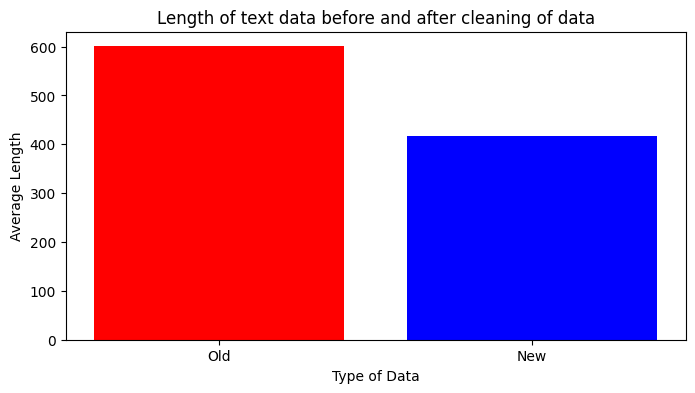

In [22]:
#list of values and labe;s
values = [length, cleaned_length]
labels = ['Old', 'New']

#plotting bar graph
plt.figure(figsize=(8,4))
plt.bar(labels, values, color=['red', 'blue'])
plt.xlabel("Type of Data")
plt.ylabel("Average Length")
plt.title("Length of text data before and after cleaning of data")
plt.show()

## Calculating genre frequency in the data

### Randomly truncating long text in the processed plot column

In [23]:
train_data['processed_plot'] = train_data['processed_plot'].apply(lambda x: x[:np.random.randint(250,2000)] if len(x)>2000 else x)

In [24]:
train_data['processed_plot'][0]

'listening toconversation doctor parents 10-year-old oscar learns nobody courage tell hasfew weeks live furious refuses speak anyone except straight-talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences asprofessional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

### Counting frequency of each genre in train_data

In [25]:
genre_freq = train_data['genre'].value_counts()

### Visualizing genre distribution with a bar *graph*

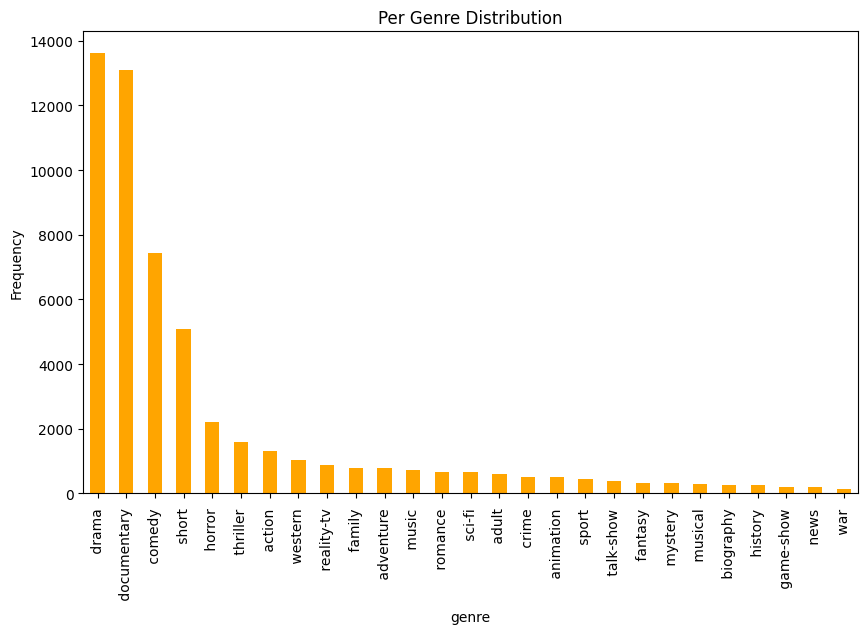

In [26]:
#plotting the bar graph
plt.figure(figsize=(10,6))
genre_freq.plot(kind='bar', color='orange')
plt.ylabel('Frequency')
plt.title('Per Genre Distribution')
plt.show()

## Creating feature column

### Merging movie title and plot together

In [27]:
train_data.head(2)

,id,title,genre,description,processed_plot,input
0,1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",listening toconversation doctor parents 10-year-old oscar learns nobody courage tell hasfew weeks live furious refuses speak anyone except straight-talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences asprofessional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue,Oscar et la dame rose (2009) listening toconversation doctor parents 10-year-old oscar learns nobody courage tell hasfew weeks live furious refuses speak anyone except straight-talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences asprofessional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.,brother sister withpast incestuous relationship havecurrent murderous relationship murders women reject murders women get close,Cupid (1997) brother sister withpast incestuous relationship havecurrent murderous relationship murders women reject murders women get close


### Removing the 'plot' column from training and testing df

In [28]:
train_data.drop(columns=['description'], inplace=True)
df_test.drop(columns=['description'], inplace=True)

### Combining title and processepd plot into a single feature column

In [29]:
train_data['input'] = train_data['title'] + " " + train_data['processed_plot']
df_test['input'] = df_test['title'] + " " + df_test['processed_plot']

In [30]:
train_data.sample()

,id,title,genre,processed_plot,input
5130,5131,Lovehotels (2006),comedy,four girls lovehotel ...... keepssecret two boyfriends went boys room christmas sakura toru friends school days although toru married misaki sakura affair toru sachi taku friends keep relationships sex friends n't like sex love father lovehotel owner watches many lovers bad relationships four girls lovehotels ...... keepssecret two boyfriends went boys room christmas sakura toru friends school days although toru married misaki sakura affair toru sachi taku friends keep relationships sex friends n't like sex love father lovehotels owner watches many lovers bad relationships,Lovehotels (2006) four girls lovehotel ...... keepssecret two boyfriends went boys room christmas sakura toru friends school days although toru married misaki sakura affair toru sachi taku friends keep relationships sex friends n't like sex love father lovehotel owner watches many lovers bad relationships four girls lovehotels ...... keepssecret two boyfriends went boys room christmas sakura toru friends school days although toru married misaki sakura affair toru sachi taku friends keep relationships sex friends n't like sex love father lovehotels owner watches many lovers bad relationships


## ALL DATA

In [31]:
all_text = pd.concat([train_data['input'], df_test['input']])

In [32]:
all_text.shape

(108414,)

## TF-IDF Vectorizer

In [33]:
tfidf = TfidfVectorizer(max_features=35000, ngram_range=(1,2)) #consiedering unigrams and bigrams
tfidf.fit(all_text)

X_train_vec = tfidf.transform(train_data['input'])
X_test_vec = tfidf.transform(df_test['input'])

## Encode Labels

In [34]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(train_data['genre'])
y_test_enc = encoder.fit_transform(df_test['genre'])

## Modelling Data

### Randomizing the data

In [35]:
sampler = RandomOverSampler(random_state=50)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_vec, y_train_enc)

### Modelling

In [36]:
mnb = MultinomialNB(alpha=0.5)
bnb = BernoulliNB()
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500, random_state=50, tol=0.1, n_jobs=5)
svc = LinearSVC()

### Logistic Regression

In [37]:
lgc.fit(X_train_resampled, y_train_resampled)
lgc.score(X_test_vec, y_test_enc)

0.5589667896678967

### Support Vector Machine

In [38]:
svc.fit(X_train_resampled, y_train_resampled)
svc.score(X_test_vec, y_test_enc)

0.5462361623616236

### Bernoulli Naive Bayes

In [39]:
bnb.fit(X_train_resampled, y_train_resampled)
bnb.score(X_test_vec, y_test_enc)

0.5624723247232473

### Multinomial Naive Bayes

In [40]:
mnb.fit(X_train_resampled, y_train_resampled)
mnb.score(X_test_vec, y_test_enc)

0.5532287822878229

## Accuracy Metrics

### Accuracy Score

Accuracy score is the most basic metric for evaluating classification models. It represents the percentage of correctly classified instances out of the total number of instances.

A higher accuracy score generally indicates a better-performing model, but it can be misleading in cases of imbalanced datasets (where some classes have significantly more instances than others).

In [41]:
ypred_test_lgc = lgc.predict(X_test_vec)
ypred_train_lgc = lgc.predict(X_train_resampled)

ypred_test_bnb = bnb.predict(X_test_vec)
ypred_train_bnb = bnb.predict(X_train_resampled)

ypred_test_mnb = mnb.predict(X_test_vec)
ypred_train_mnb = mnb.predict(X_train_resampled)

ypred_test_svc = svc.predict(X_test_vec)
ypred_train_svc = svc.predict(X_train_resampled)

print("Logostic Regression: ")
print("Training Accuracy: ", accuracy_score(y_train_resampled, ypred_train_lgc))
print("Testing Accuracy: ", accuracy_score(y_test_enc, ypred_test_lgc))

print("\nBernoulli Naive Bayes: ")
print("Training Accuracy: ", accuracy_score(y_train_resampled, ypred_train_bnb))
print("Testing Accuracy: ", accuracy_score(y_test_enc, ypred_test_bnb))

print("\nMultinomial Naive Bayes: ")
print("Training Accuracy: ", accuracy_score(y_train_resampled, ypred_train_mnb))
print("Testing Accuracy: ", accuracy_score(y_test_enc, ypred_test_mnb))

print("\nSupport Vector Machine: ")
print("Training Accuracy: ", accuracy_score(y_train_resampled, ypred_train_svc))
print("Testing Accuracy: ", accuracy_score(y_test_enc, ypred_test_svc))

Logostic Regression: 
Training Accuracy:  0.955151802062843
Testing Accuracy:  0.5589667896678967

Bernoulli Naive Bayes: 
Training Accuracy:  0.9386234835437803
Testing Accuracy:  0.5624723247232473

Multinomial Naive Bayes: 
Training Accuracy:  0.9442934449913073
Testing Accuracy:  0.5532287822878229

Support Vector Machine: 
Training Accuracy:  0.9947952801107873
Testing Accuracy:  0.5462361623616236


### Classification Report

A classification report provides a more comprehensive evaluation of a classification model's performance by presenting precision, recall, F1-score, and support for each class.

Components:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It measures how well the model avoids false positives.
- Recall: The ratio of correctly predicted positive observations to all actual positives. It measures how well the model identifies all positive instances.
- F1-Score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
- Support: The number of actual instances in each class.

The classification report gives a detailed view of how well the model is performing for each class, allowing you to identify potential weaknesses in specific areas.

In [42]:
from sklearn.metrics import classification_report

report = classification_report(y_test_enc, ypred_test_lgc)
print(report)

              precision    recall  f1-score   support

           0       0.35      0.50      0.41      1314
           1       0.47      0.62      0.53       590
           2       0.28      0.32      0.30       775
           3       0.28      0.28      0.28       498
           4       0.10      0.10      0.10       264
           5       0.60      0.56      0.58      7446
           6       0.18      0.27      0.22       505
           7       0.78      0.70      0.74     13096
           8       0.69      0.54      0.61     13612
           9       0.22      0.31      0.26       783
          10       0.21      0.21      0.21       322
          11       0.70      0.71      0.71       193
          12       0.11      0.14      0.12       243
          13       0.59      0.66      0.63      2204
          14       0.46      0.71      0.56       731
          15       0.20      0.23      0.21       276
          16       0.18      0.14      0.16       318
          17       0.34    

### Confusion Matrix

A confusion matrix is a table that visualizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives for each class.

Structure:
- True Positives (TP): Correctly predicted positive instances.
- True Negatives (TN): Correctly predicted negative instances.
- False Positives (FP): Incorrectly predicted positive instances (Type I error).
- False Negatives (FN): Incorrectly predicted negative instances (Type II error).

The confusion matrix helps you understand which classes the model is confusing with each other and the types of errors it's making. It's particularly useful for identifying patterns in misclassifications.

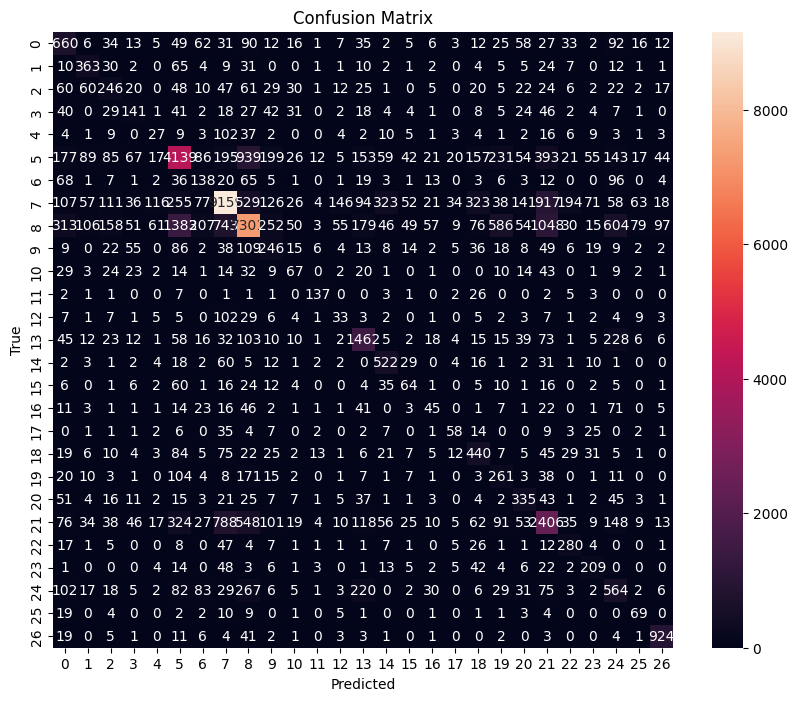

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_enc, ypred_test_lgc)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Movie Genre Prediction using Logistic Regression and TF-IDF Vectorizer on Example Text

In [45]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#Load Data
import kagglehub
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)

train_data = pd.read_csv(path + "/Genre Classification Dataset/train_data.txt", sep=':::', header=None, names=['id','title','genre','description'], engine='python')
test_data = pd.read_csv(path + "/Genre Classification Dataset/test_data_solution.txt", sep=':::', header=None, names=['id','title','genre','description'], engine='python')

#Preprocessing Data
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()

    #Remove Numbers
    text = re.sub(r'\d+', '', text)

    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    #Tokenize Text
    tokens = word_tokenize(text)

    #Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    #return preprocessed text as a single string
    return ' '.join(filtered_tokens)

train_data['processed_description'] = train_data['description'].apply(preprocess_text)
test_data['processed_description'] = test_data['description'].apply(preprocess_text)

#Prepare data for classification
X_train = train_data['processed_description']
y_train = train_data['genre']
X_test = test_data['processed_description']
y_test = test_data['genre']

#Encode Labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Initialize TF-IDF Vectorizer and Logistic Regression Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

#Train the model
pipeline.fit(X_train, y_train_encoded)

#define example input values
example_texts = [
    "a boy and a girl fall in love",
    "a thrilling chase and a tense fight",
    "animals grazing in a field"
]

#Test with Example Inputs
preprocessed_texts = [preprocess_text(text) for text in example_texts]
predictions_encoded = pipeline.predict(preprocessed_texts)
predictions = label_encoder.inverse_transform(predictions_encoded)

#output predictions
for text, prediction in zip(example_texts, predictions):
    print(f"Text: {text}\nPredicted Genre: {prediction}\n")

Path to dataset files: /root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text: a boy and a girl fall in love
Predicted Genre:  romance 

Text: a thrilling chase and a tense fight
Predicted Genre:  action 

Text: animals grazing in a field
Predicted Genre:  documentary 

